In [3]:
%pip install seaborn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

<ipython-input-4-932edaa34b32>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [6]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

In [7]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

In [8]:
df = pd.read_csv(file_name)

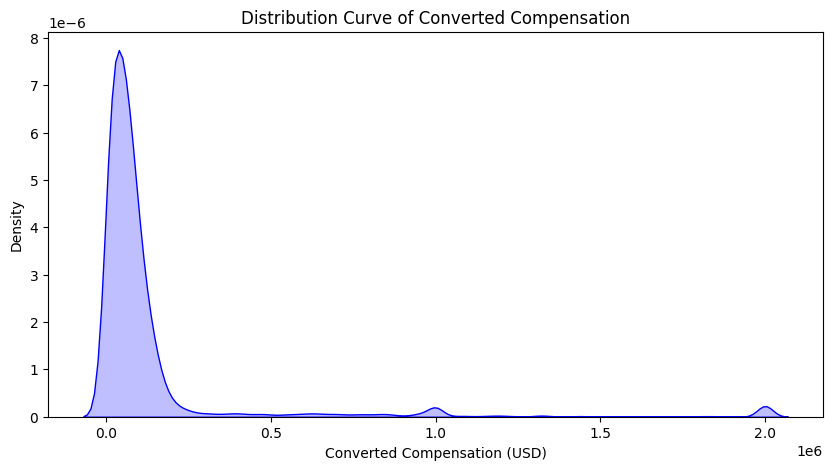

In [10]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='ConvertedComp', fill=True, color='blue', bw_adjust=0.5)
plt.title('Distribution Curve of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Density')
plt.show()

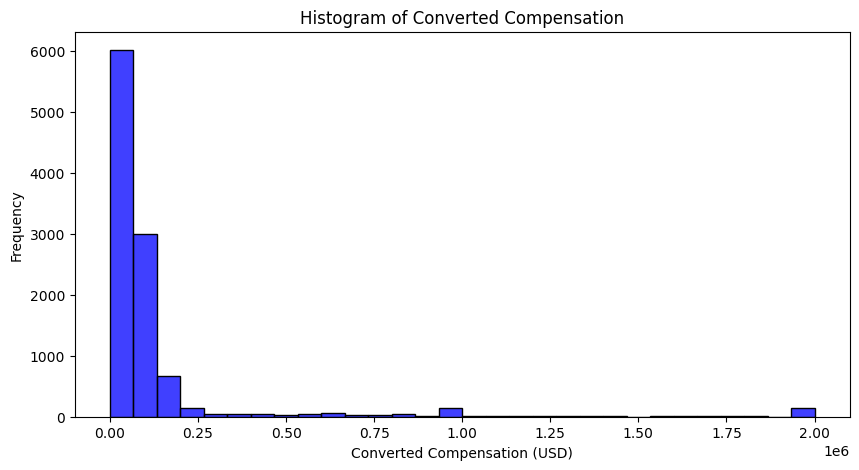

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='ConvertedComp', bins=30, kde=False, color='blue')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.show()

In [12]:
median_converted_comp = df['ConvertedComp'].median()
print("Median of ConvertedComp:", median_converted_comp)

Median of ConvertedComp: 57745.0


In [13]:
count_men = df[df['Gender'] == 'Man'].shape[0]
print("Number of responders identifying as 'Man':", count_men)

Number of responders identifying as 'Man': 10480


In [14]:
median_converted_comp_women = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print("Median ConvertedComp for responders identifying as 'Woman':", median_converted_comp_women)

Median ConvertedComp for responders identifying as 'Woman': 57708.0


In [15]:
five_number_summary = df['Age'].describe()
print("Five Number Summary for Age:")
print(five_number_summary[['min', '25%', '50%', '75%', 'max']])

Five Number Summary for Age:
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


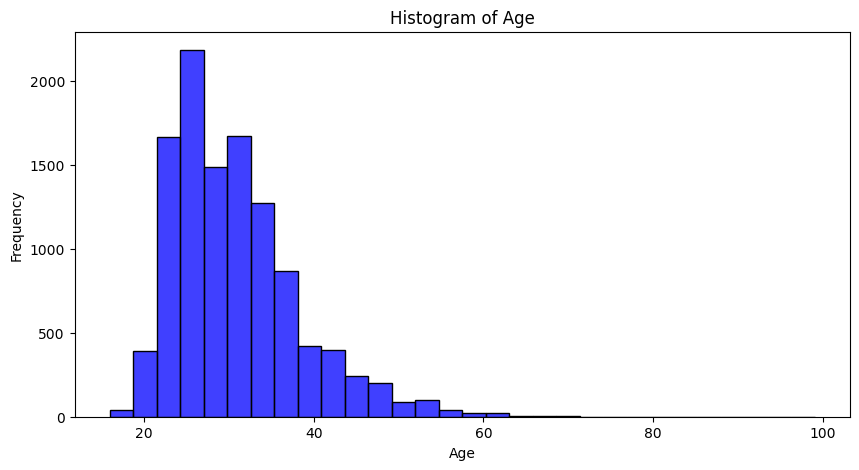

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', bins=30, kde=False, color='blue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [17]:
median_age = df['Age'].median()
print("Median Age of survey respondents:", median_age)

Median Age of survey respondents: 29.0


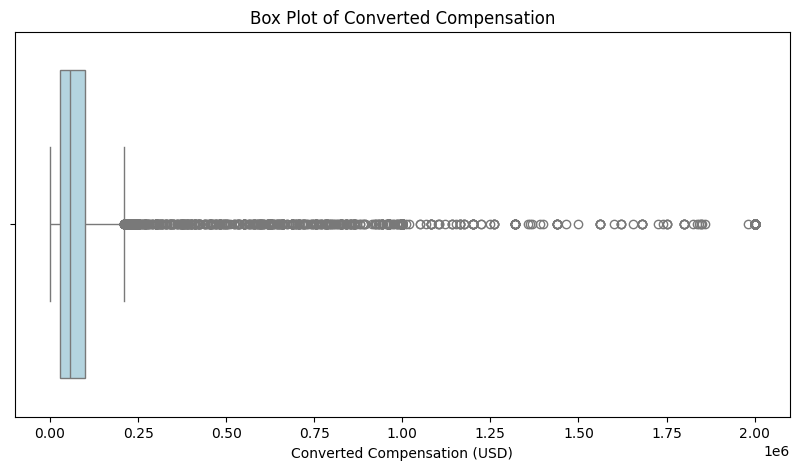

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['ConvertedComp'], color='lightblue')
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.show()

In [19]:
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75) 
iqr = q3 - q1  
print("Interquartile Range (IQR) for ConvertedComp:", iqr)

Interquartile Range (IQR) for ConvertedComp: 73132.0


In [21]:
q1 = df['ConvertedComp'].quantile(0.25)  # First quartile
q3 = df['ConvertedComp'].quantile(0.75)  # Third quartile
iqr = q3 - q1
print(iqr)

73132.0


In [24]:
outliers = (df["ConvertedComp"] < (q1 - 1.5 * iqr)) | (df["ConvertedComp"] > (q3 + 1.5 * iqr))
outliers.value_counts()

ConvertedComp
False    10519
True       879
Name: count, dtype: int64

In [25]:

q1 = df['ConvertedComp'].quantile(0.25) 
q3 = df['ConvertedComp'].quantile(0.75)
iqr = q3 - q1  
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
print("New DataFrame without outliers:")
print(df_no_outliers)


New DataFrame without outliers:
       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
5              19  I am a developer by profession      Yes   
...           ...                             ...      ...   
11392       25134  I am a developer by profession      Yes   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than

In [26]:
median_converted_comp_before = df['ConvertedComp'].median()
print("Median ConvertedComp before removing outliers:", median_converted_comp_before)

Median ConvertedComp before removing outliers: 57745.0


In [27]:
median_converted_comp_after = df_no_outliers['ConvertedComp'].median()
print("Median ConvertedComp after removing outliers:", median_converted_comp_after)

Median ConvertedComp after removing outliers: 52704.0


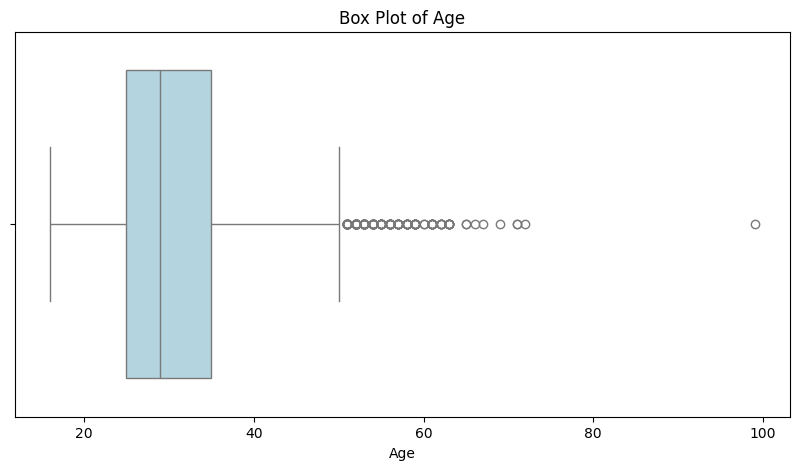

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Age'], color='lightblue')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

In [29]:
mean_converted_comp_after = df_no_outliers['ConvertedComp'].mean()
print("Mean ConvertedComp after removing outliers:", mean_converted_comp_after)

Mean ConvertedComp after removing outliers: 59883.20838915799


In [30]:

q1_age = df['Age'].quantile(0.25)  
iqr_age = df['Age'].quantile(0.75) - q1_age  
lower_bound_age = q1_age - 1.5 * iqr_age
outliers_below_q1 = df[df['Age'] < lower_bound_age]
num_outliers_below_q1 = outliers_below_q1.shape[0]

print("Number of outliers in Age below Q1:", num_outliers_below_q1)

Number of outliers in Age below Q1: 0


In [ ]:

numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
age_correlation = correlation_matrix[['Age']]
age_correlation.columns = ['Correlation with Age']
print("Correlation between Age and other numerical columns:")
print(age_correlation)
